Use a **Genetic Algorithm** to find a solution to the 5-Queens problem, where you must place 5 queens on a 5×5 chessboard such that no two queens attack each other.
  


  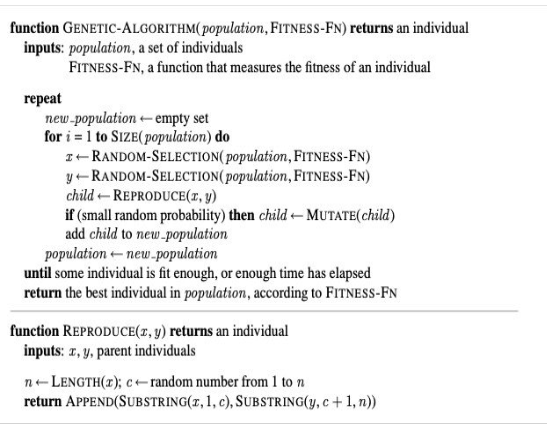

In [1]:
import random

N = 8  # Change to any N you want

def generate_individual():
    return [random.randint(0, N-1) for _ in range(N)]

def fitness(individual):
    non_attacking = 0
    for i in range(N):
        for j in range(i+1, N):
            if individual[i] != individual[j] and abs(individual[i] - individual[j]) != abs(i - j):
                non_attacking += 1
    return non_attacking

def crossover(parent1, parent2):
    point = random.randint(1, N-2)
    return parent1[:point] + parent2[point:]

def mutate(individual):
    idx = random.randint(0, N-1)
    individual[idx] = random.randint(0, N-1)
    return individual

def genetic_algorithm(max_generations=1000):
    population = [generate_individual() for _ in range(100)]
    max_fitness = (N * (N - 1)) // 2

    for generation in range(max_generations):
        population.sort(key=fitness, reverse=True)

        if fitness(population[0]) == max_fitness:
            print(f"Solution found in generation {generation}: {population[0]}")
            return population[0]

        new_population = population[:20]  # Elitism

        while len(new_population) < 100:
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = crossover(parent1, parent2)
            if random.random() < 0.3:
                child = mutate(child)
            new_population.append(child)

        population = new_population

    print("No solution found.")
    return None

# Run
genetic_algorithm()


No solution found.


Task 01: Solving the TSP (Travelling Salesman Problem) Using Genetic Algorithm
You are given a list of cities and the distances between each pair. The objective is to find the shortest possible tour that visits each city exactly once and returns to the starting city.


| From / To | A | B | C | D | E |
| ------------- | ----- | ----- | ----- | ----- | ----- |
| A        | –     | 2     | 9     | 10    | 7     |
| B         | 2     | –     | 6      | 4     | 3     |
| C        | 9     | 6     | –      | 8     | 5     |
| D         | 10    | 4     | 8     | –     | 6     |
| E         | 7     | 3     | 5     | 6     | –     |

Fitness value calculation: fitness = 1 / total_tour_cost







In [2]:
import random

cities = ['A', 'B', 'C', 'D', 'E']
distance = {
    ('A', 'B'): 2, ('A', 'C'): 9, ('A', 'D'): 10, ('A', 'E'): 7,
    ('B', 'C'): 6, ('B', 'D'): 4, ('B', 'E'): 3,
    ('C', 'D'): 8, ('C', 'E'): 5,
    ('D', 'E'): 6
}

#Start coding from here


In [6]:
#GA
for (a, b), d in list(distance.items()):
    distance[(b, a)] = d

def FITNESS_FN(tour):
    cost = 0
    for i in range(len(tour)):
        cost += distance[(tour[i], tour[(i + 1) % len(tour)])]
    return 1 / cost

def RANDOM_SELECTION(population, fitness_fn):
    total_fitness = sum(fitness_fn(ind) for ind in population)
    r = random.uniform(0, total_fitness)
    acc = 0
    for individual in population:
        acc += fitness_fn(individual)
        if acc >= r:
            return individual
    return population[-1]  # Fallback

def REPRODUCE(x, y):
    n = len(x)
    c = random.randint(1, n - 1)
    child = x[:c]
    for city in y:
        if city not in child:
            child.append(city)
    return child

def MUTATE(individual):
    i, j = random.sample(range(len(individual)), 2)
    individual[i], individual[j] = individual[j], individual[i]
    return individual

def GENETIC_ALGORITHM(population, fitness_fn, max_generations=500):
    for generation in range(max_generations):
        new_population = []
        for _ in range(len(population)):
            x = RANDOM_SELECTION(population, fitness_fn)
            y = RANDOM_SELECTION(population, fitness_fn)
            child = REPRODUCE(x, y)
            if random.random() < 0.2:
                child = MUTATE(child)
            new_population.append(child)
        population = new_population
    # Return best individual
    population.sort(key=fitness_fn, reverse=True)
    best = population[0]
    print(f"Best tour: {best}, cost: {1 / fitness_fn(best)}")
    return best

# Run the GA
initial_population = [random.sample(cities, len(cities)) for _ in range(100)]
GENETIC_ALGORITHM(initial_population, FITNESS_FN)


Best tour: ['A', 'E', 'C', 'D', 'B'], cost: 26.0


['A', 'E', 'C', 'D', 'B']